In [10]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders


# Load a non-stationary dataset
df1 = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)
df1.index.freq = 'D'

In [11]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
model = auto_arima(df1['q'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5844
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -37775.806
Date:                Thu, 28 Jul 2022   AIC                          75561.611
Time:                        17:01:14   BIC                          75594.977
Sample:                             0   HQIC                         75573.214
                               - 5844                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2228      3.275      3.426      0.001       4.803      17.642
ar.L1          0.8289      0.009     93.958      0.000       0.812       0.846
ma.L1         -0.1134      0.009    -12.273      0.000      -0.131      -0.095
ma.L2         -0.2319      0.008    -27.414      0.000      -0.248      -0.215
sigma2      2.415e+04     82.302    293.459      0.000     2.4e+04    2.43e+04
===================================================================================
Ljung-Box (Q):                      168.33   Jarque-Bera (JB):          10120424.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            11.39
Prob(H) (two-sided):                  0.00   Kurtosis:                       205.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

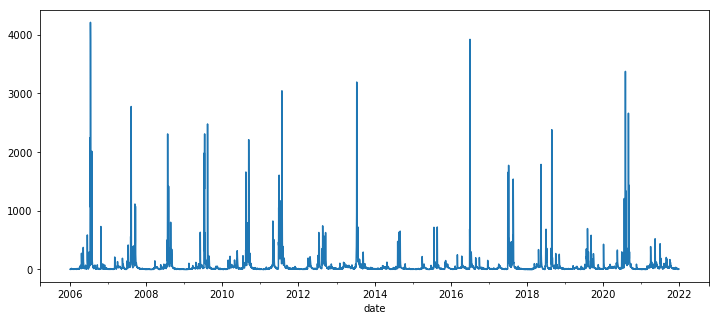

In [6]:
df1['q'].plot(figsize=(12,5));

In [7]:
train = df1.iloc[:4383]
test = df1.iloc[4383:]

In [11]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [12]:
model = ARIMA(train['q'],order=(1,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      q   No. Observations:                 4383
Model:                     ARMA(1, 2)   Log Likelihood              -28412.046
Method:                       css-mle   S.D. of innovations            158.112
Date:                Thu, 28 Jul 2022   AIC                          56834.092
Time:                        13:02:57   BIC                          56866.020
Sample:                    01-01-2006   HQIC                         56845.357
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1172      9.454      6.994      0.000      47.588      84.647
ar.L1.q        0.8380      0.018     47.159      0.000       0.803       0.873
ma.L1.q       -0.0801      0.025     -3.234      0.001      -0.129      -0.032
ma.L2.q       -0.2780      0.024    -11.710      0.000      -0.324      -0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1933           +0.0000j            1.1933            0.0000
MA.1            1.7582           +0.0000j            1.7582            0.0000
MA.2           -2.0463           +0.0000j            2.0463            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('Predictions')

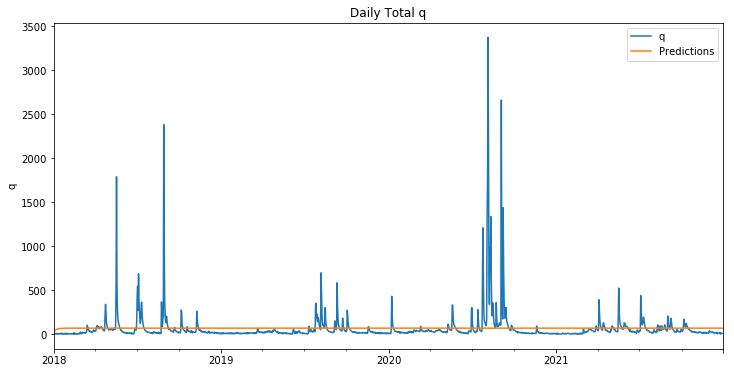

In [14]:
title = 'Daily Total q'
ylabel='q'
xlabel='' # we don't really need a label here

ax = test['q'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df1['q'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.554311e+00
p-value                 2.522818e-16
# lags used             3.300000e+01
# observations          5.810000e+03
critical value (1%)    -3.431476e+00
critical value (5%)    -2.862038e+00
critical value (10%)   -2.567035e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
